# Data Mining Lab- Assessment 6
Roshni Joshi- 21BDS0338

1. Simulate Page Rank algorithm in Python


In [1]:
!pip install networkx matplotlib

Page Ranks: [0.3017469  0.12175769 0.37824231 0.1982531 ]


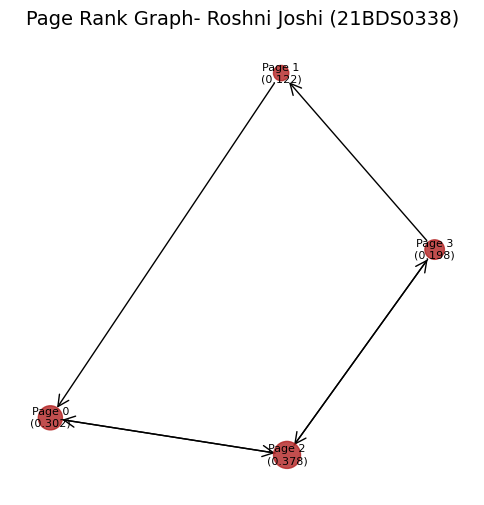

In [12]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def page_rank(graph, d=0.85, max_iter=100, tol=1e-6):
    """
    graph: Adjacency matrix where graph[i][j] is 1 if there's a link from page j to page i, otherwise 0.
    d: Damping factor, usually set to 0.85.
    max_iter: Maximum number of iterations for convergence.
    tol: Tolerance level for convergence.

    Returns: Ranks of each page.
    """
    n = len(graph)
    M = np.array(graph, dtype=float)
    
    # Normalize columns of M to get the link probability (stochastic matrix)
    column_sums = M.sum(axis=0)
    M[:, column_sums != 0] /= column_sums[column_sums != 0]
    
    # Initialize the rank vector
    ranks = np.ones(n) / n
    
    # Teleportation vector (handles dangling nodes)
    teleport = np.ones(n) / n
    
    # Iteratively update PageRank values
    for i in range(max_iter):
        new_ranks = d * np.dot(M, ranks) + (1 - d) * teleport
        if np.linalg.norm(new_ranks - ranks, ord=1) < tol:
            break
        ranks = new_ranks
    
    return ranks

def visualize_page_rank(graph, ranks):
    """
    Visualizes the PageRank results using NetworkX and Matplotlib.
    graph: Adjacency matrix
    ranks: PageRank scores of each page
    """
    # Create a directed graph using NetworkX
    G = nx.DiGraph()

    # Add nodes
    num_nodes = len(graph)
    for i in range(num_nodes):
        G.add_node(i, size=ranks[i] * 1000)  # Scale the size for better visibility

    # Add edges (links between pages)
    for i in range(num_nodes):
        for j in range(num_nodes):
            if graph[i][j] == 1:
                G.add_edge(j, i)  # Edge from j to i (because graph[i][j] means link from j to i)

    # Plot the graph
    plt.figure(figsize=(6, 6))
    pos = nx.spring_layout(G, seed=42)  # Positions for all nodes

    # Draw the nodes with size based on PageRank score
    node_sizes = [G.nodes[i]['size'] for i in G.nodes]
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='firebrick', alpha=0.8)

    # Draw the edges
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='black')

    # Draw the labels (node number and rank value)
    labels = {i: f"Page {i}\n({ranks[i]:.3f})" for i in G.nodes}
    nx.draw_networkx_labels(G, pos, labels, font_size=8)

    plt.title("Page Rank Graph- Roshni Joshi (21BDS0338)", fontsize=14)
    plt.axis('off')
    plt.show()

# Example graph (adjacency matrix representation)
graph = [
    [0, 1, 1, 0],
    [0, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 0, 1, 0]
]

# Calculate PageRank
ranks = page_rank(graph)

# Print the PageRank values
print("Page Ranks:", ranks)

# Visualize the PageRank results
visualize_page_rank(graph, ranks)


2. Write a Python program to measure document similarity.

Cosine Similarity Matrix:
[[1.         0.34745121 0.17567412 0.04878201 0.06376939 0.5259224
  0.72190903]
 [0.34745121 1.         0.         0.04098396 0.21717936 0.11277081
  0.24040282]
 [0.17567412 0.         1.         0.         0.         0.68306509
  0.16717793]
 [0.04878201 0.04098396 0.         1.         0.48835015 0.02900527
  0.02321137]
 [0.06376939 0.21717936 0.         0.48835015 1.         0.03791661
  0.03034264]
 [0.5259224  0.11277081 0.68306509 0.02900527 0.03791661 1.
  0.43661897]
 [0.72190903 0.24040282 0.16717793 0.02321137 0.03034264 0.43661897
  1.        ]]


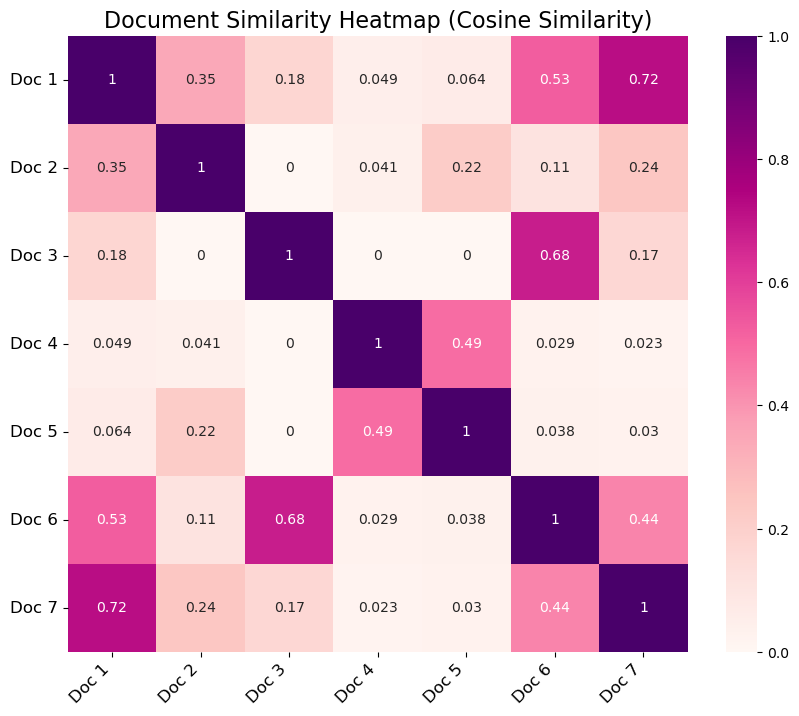

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

def compute_document_similarity(documents):
    """
    Compute the similarity between documents using TF-IDF and Cosine Similarity.
    
    documents: List of strings, where each string is a document.
    
    Returns: Cosine similarity matrix.
    """
    # Create a TF-IDF Vectorizer
    tfidf_vectorizer = TfidfVectorizer()
    
    # Fit and transform the documents into TF-IDF vectors
    tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
    
    # Compute Cosine Similarity between TF-IDF vectors
    cosine_sim = cosine_similarity(tfidf_matrix)
    
    return cosine_sim

def visualize_similarity_matrix(similarity_matrix, documents):
    """
    Visualize the similarity matrix using a heatmap.
    
    similarity_matrix: 2D array with cosine similarity values.
    documents: List of document names or labels to display on the axes.
    """
    plt.figure(figsize=(8, 6))
    
    # Create a heatmap using seaborn
    sns.heatmap(similarity_matrix, annot=True, cmap='RdPu', xticklabels=documents, yticklabels=documents)
    
    # Set the title and labels
    plt.title("Document Similarity Heatmap (Cosine Similarity)", fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.show()

# Example usage
documents = [
    "The sky is blue and beautiful.",
    "Love this blue and bright sky!",
    "The quick brown fox jumps over the lazy dog.",
    "A king's breakfast has sausages, ham, bacon, eggs, toast and beans.",
    "I love green eggs, ham, sausages, and bacon!",
    "The brown fox is quick and the blue dog is lazy!",
    "The sky is very blue and the sky is very beautiful today."
]

# Compute document similarity
similarity_matrix = compute_document_similarity(documents)

# Print the similarity matrix
print("Cosine Similarity Matrix:")
print(similarity_matrix)

# Visualize the document similarity matrix
visualize_similarity_matrix(similarity_matrix, [f'Doc {i+1}' for i in range(len(documents))])
